In [1]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np

In [2]:
# Create Random Data of 40

np.random.seed(0)

n = 40

data = pd.DataFrame({
    'experience': np.random.randint(1,12,n),
    'skill': np.random.randint(40,100,n),
    'education': np.random.choice(['UG','PG','PhD'],n),
    'city': np.random.choice(['Tier1','Tier2'],n)
})

data['salary'] = (
    1.5*data['experience']+
    0.08*data['skill']+
    data['education'].map({'UG':0, 'PG':3, 'PhD':6})+
    data['city'].map({'Tier1':2, 'Tier2':0})+
    np.random.normal(0,1,n)
)
print(data.head())

   experience  skill education   city     salary
0           6     41       PhD  Tier2  17.289097
1           1     49        UG  Tier2   6.437880
2           4     97       PhD  Tier2  20.101587
3           4     72        PG  Tier2  13.509114
4           8     71        UG  Tier1  20.605251


m:  [1.2925066]

c:  10.688733726048198


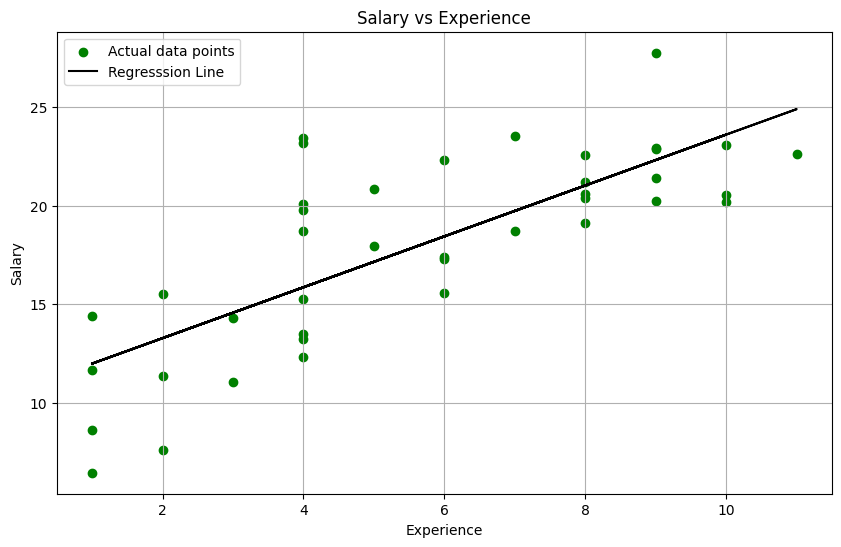

In [4]:
# Linear Regression Line Fitting

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = data[['experience']]
y = data['salary']

model = LinearRegression()
model.fit(X,y)

print('m: ', model.coef_)
print('\nc: ', model.intercept_)

y_pred = model.predict(X)

plt.figure(figsize =(10,6))
plt.scatter(X, y, color= 'green', label = 'Actual data points')
plt.plot(X, y_pred, color = 'black', label = 'Regresssion Line')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


[[ 0.12020821 -1.56396436]
 [-1.59705199 -1.14690719]
 [-0.56669587  1.35543578]
 [-0.56669587  0.05213215]
 [ 0.80711229  0.        ]
 [ 1.49401638 -1.09477505]
 [-0.56669587  1.09477505]
 [ 0.12020821 -0.41705716]
 [-0.91014791  0.20852858]
 [-0.22324383 -1.0426429 ]
 [ 0.80711229  0.99051076]
 [ 0.46366025  1.25117149]
 [ 1.15056434 -0.15639644]
 [ 1.15056434  0.15639644]
 [ 1.83746842 -1.6160965 ]
 [-1.25359995 -1.6160965 ]
 [ 0.46366025  0.26066073]
 [ 0.80711229  1.14690719]
 [ 0.80711229 -1.35543578]
 [ 1.15056434  0.36492502]
 [-1.25359995  0.46918931]
 [ 0.12020821  1.09477505]
 [ 1.49401638 -0.72985003]
 [ 1.15056434 -0.83411432]
 [ 1.49401638 -1.40756792]
 [-0.22324383  0.52132145]
 [-0.56669587  0.5734536 ]
 [-1.59705199  1.40756792]
 [-0.56669587  0.        ]
 [ 0.12020821  1.30330363]
 [-1.59705199 -1.56396436]
 [-0.91014791 -1.56396436]
 [-0.56669587  0.41705716]
 [ 1.15056434  0.52132145]
 [-1.25359995  1.35543578]
 [-0.56669587  0.20852858]
 [-0.56669587  0.36492502]
 

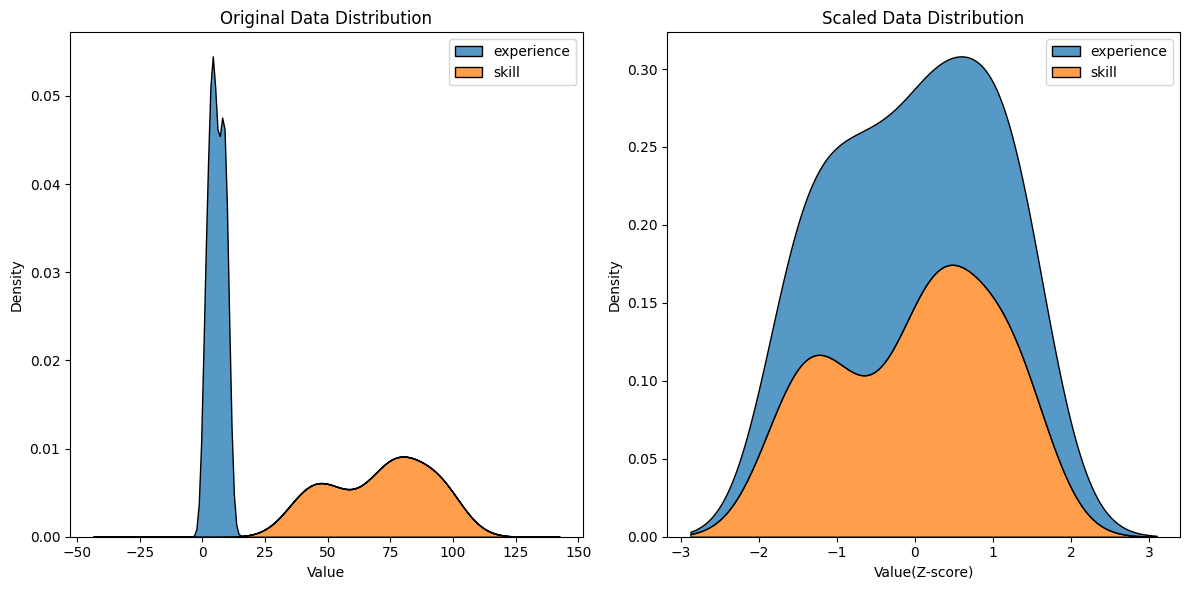


Original data mean/std:        experience   skill
mean       5.650  71.000
std        2.949  19.426

Scaled data mean/std:        experience  skill
mean      -0.000 -0.000
std        1.013  1.013


In [ ]:
# Feature Scaling z=(x-mean)/std
# Scaling two or more features to the same scale
# scaled_data: mean= 0, std= 1

from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Correct way to select multiple columns
X = data[['experience', 'skill']] 
y = data['salary']

model = LinearRegression()
model.fit(X, y)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

# Convert back to DataFrame array
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

# Set up plotting environment
fig, axes = plt.subplots(1, 2, figsize = (12,6))

# Plot original data
sns.kdeplot(data = X, ax=axes[0], fill=True, multiple='stack')
axes[0].set_title('Original Data Distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

# Plot scaled data
sns.kdeplot(data = X_scaled_df, ax=axes[1], fill=True, multiple='stack')
axes[1].set_title('Scaled Data Distribution')
axes[1].set_xlabel('Value(Z-score)')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Recheck the mean and std:0,1
print('\nOriginal data mean/std: ',X.agg(['mean','std']).round(3))
print('\nScaled data mean/std: ', X_scaled_df.agg(['mean','std']).round(3))

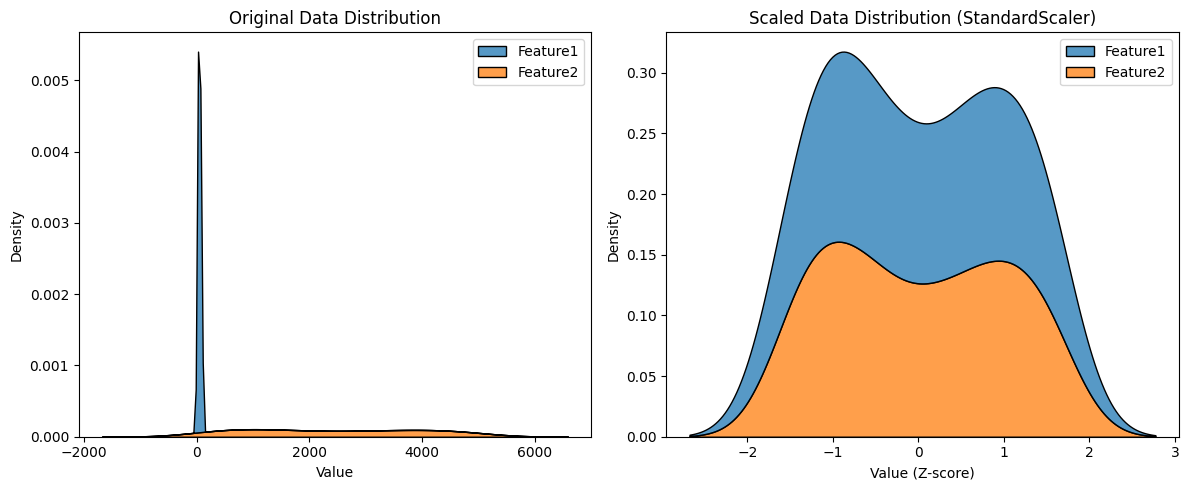

Original Data Mean/Std Dev:
      Feature1  Feature2
mean     49.12   2444.96
std      29.51   1523.62

Scaled Data Mean/Std Dev:
      Feature1  Feature2
mean     -0.00     -0.00
std       1.01      1.01


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assume 'X' is defined and loaded. For this example, we'll create sample data.
# Replace this with your actual data
data = {'Feature1': np.random.rand(100) * 100,
        'Feature2': np.random.rand(100) * 5000}
X = pd.DataFrame(data)

# Your original code:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to a DataFrame for easier plotting (optional, but helpful)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Set up the plotting environment
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original data (histograms or KDE plots work well)
sns.kdeplot(data=X, ax=axes[0], fill=True, multiple="stack")
axes[0].set_title('Original Data Distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

# Plot the scaled data
sns.kdeplot(data=X_scaled_df, ax=axes[1], fill=True, multiple="stack")
axes[1].set_title('Scaled Data Distribution (StandardScaler)')
axes[1].set_xlabel('Value (Z-score)')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Optional: Print summary statistics to verify mean=0 and std=1
print("Original Data Mean/Std Dev:")
print(X.agg(['mean', 'std']).round(2))
print("\nScaled Data Mean/Std Dev:")
print(X_scaled_df.agg(['mean', 'std']).round(2))


In [ ]:
# RMSE(Root mean square error): average error
# R2 Score: 1 - error/variance (or 1-SSE/SST ): 0 to 1 score-> useless to perfect model
# R2=0.9 :the model explains 90% variance(spreadout data), leaving 10% error = 90% accuracy

from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(X)

rmse= np.sqrt(mean_squared_error(y, pred))
r2 = r2_score(y, pred)

print('\nRMSE: ', rmse )
print('\nR2: ', r2)


RMSE:  2.7753653679908843

R2:  0.6824686876010946


In [ ]:
# Assume 'model' is your trained sklearn LinearRegression object
# and 'cols' contains your feature names
cols = ["experience", "skill", "education_PG", "education_PhD"]

# Pair column names with coefficients and print them
for c, v in zip(cols, model.coef_):
    print(f"{c} : {v:.2f} lakh")

# Optional: Print the intercept (baseline salary)
print(f"{'Baseline/Intercept': <15} : {model.intercept_:.2f} lakh")


experience : 1.41 lakh
skill : 0.08 lakh
Baseline/Intercept : 4.20 lakh


In [26]:
#### FIANL LINEAR REGRESSION MODEL ####

# Import data: Create Random Data of 40

np.random.seed(1)

n = 40

data = pd.DataFrame({
    'experience': np.random.randint(1,12,n),
    'skill': np.random.randint(40,100,n),
    'education': np.random.choice(['UG','PG','PhD'],n),
    'city': np.random.choice(['Tier1','Tier2'],n)
})

data['salary'] = (
    1.5*data['experience']+
    0.08*data['skill']+
    data['education'].map({'UG':0, 'PG':3, 'PhD':6})+
    data['city'].map({'Tier1':2, 'Tier2':0})+
    np.random.normal(0,1,n)
)
print(data.head())


   experience  skill education   city     salary
0           6     43        UG  Tier2  12.755635
1           9     46        UG  Tier1  17.157799
2          10     61       PhD  Tier2  25.573796
3           6     89       PhD  Tier2  22.947975
4           1     97        PG  Tier2  12.490095


In [27]:
# Feature encoding

data = pd.get_dummies(data, drop_first=True)

print(data.head())

   experience  skill     salary  education_PhD  education_UG  city_Tier2
0           6     43  12.755635          False          True        True
1           9     46  17.157799          False          True       False
2          10     61  25.573796           True         False        True
3           6     89  22.947975           True         False        True
4           1     97  12.490095          False         False        True


In [28]:
# Split data

from sklearn.model_selection import train_test_split

X = data.drop("salary", axis=1)
y = data["salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [29]:
# Scale and Train (Pipeline)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

pipe.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scale', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None


In [30]:
# Evaluate

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

pred = pipe.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R2:", r2_score(y_test, pred))


RMSE: 0.823925862667976
R2: 0.976431473275153


In [38]:
# Predict new employee based on model

new_emp = [[4, 65, 1, 0, 0]]  # exp, skill, PhD, UG, city2

print(f'The predicted salary of new employee: {pipe.predict(new_emp)[0]} lakhs')


The predicted salary of new employee: 19.188359979592434 lakhs


f:\Python code\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Advanced Model

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

# dataset
df = pd.DataFrame({
    "exp":[1,2,3,4,5,6,7,8],
    "skill":[40,50,60,70,75,80,90,95],
    "salary":[3,5,7,9,11,13,17,20]
})

X = df[["exp","skill"]]
y = df["salary"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("ridge", Ridge())
])

params = {"ridge__alpha":[0.1,1,10]}

grid = GridSearchCV(pipe, params, cv=4)
grid.fit(X_train, y_train)

pred = grid.predict(X_test)

print("Best:", grid.best_params_)
print("R2:", r2_score(y_test, pred))


Best: {'ridge__alpha': 0.1}
R2: 0.9871345594754664


f:\Python code\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
f:\Python code\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
f:\Python code\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
f:\Python code\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
f:\Python code\.venv\Lib\site-packages\sklearn\metrics\_regression.py:1288: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

   exp  skill education   city     salary
0    9     90        UG  Tier2  18.121443
1    9     85        PG  Tier1  24.542844
2    7     98        PG  Tier1  22.453247
3    3     55       PhD  Tier2  15.123093
4    9     81        PG  Tier2  21.737972
Coefficients: [ 3.45762712 -0.14067797]
Intercept: 4.91313559322033


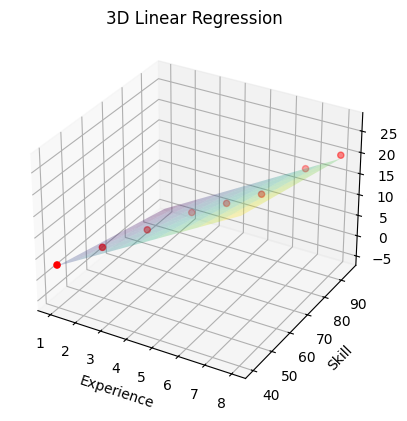

In [44]:
# Multiple Regression

# Import data: Create Random Data of 40

np.random.seed(2)

n = 40

data = pd.DataFrame({
    'exp': np.random.randint(1,12,n),
    'skill': np.random.randint(40,100,n),
    'education': np.random.choice(['UG','PG','PhD'],n),
    'city': np.random.choice(['Tier1','Tier2'],n)
})

data['salary'] = (
    1.5*data['exp']+
    0.08*data['skill']+
    data['education'].map({'UG':0, 'PG':3, 'PhD':6})+
    data['city'].map({'Tier1':2, 'Tier2':0})+
    np.random.normal(0,1,n)
)
print(data.head())

X = df[["exp","skill"]]
y = df["salary"]

# Model
model = LinearRegression()
model.fit(X,y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Visualization
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot data points
ax.scatter(df["exp"], df["skill"], df["salary"], color='red', label='Data Points')

# Create meshgrid for prediction surface
exp_range = np.linspace(df["exp"].min(), df["exp"].max(), 10)
skill_range = np.linspace(df["skill"].min(), df["skill"].max(), 10)
E, S = np.meshgrid(exp_range, skill_range)
Z = model.intercept_ + model.coef_[0]*E + model.coef_[1]*S

# Plot surface
ax.plot_surface(E, S, Z, alpha=0.3, cmap='viridis')

ax.set_xlabel('Experience')
ax.set_ylabel('Skill')
ax.set_zlabel('Salary')
plt.title('3D Linear Regression')
plt.show()


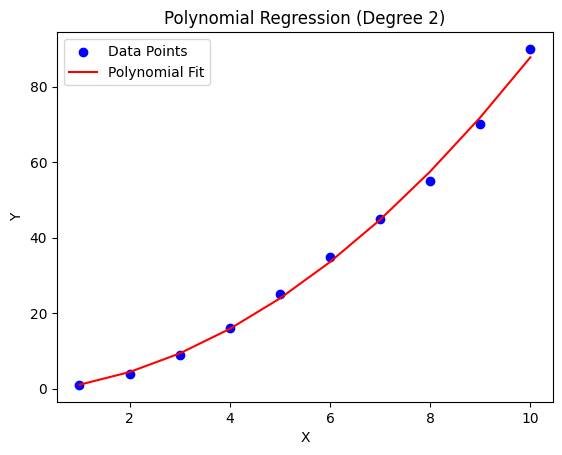

In [ ]:
# Polynomial Regression

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample Data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([1, 4, 9, 16, 25, 35, 45, 55, 70, 90]) # Nonlinear data

# Create Polynomial Features (degree 2)
poly_features = PolynomialFeatures(degree=2)

X_poly = poly_features.fit_transform(X)

# Train the Model
model = LinearRegression()
model.fit(X_poly, y)

y_poly_pred = model.predict(X_poly)

# Visualization
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_poly_pred, color='red', label='Polynomial Fit')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
